In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from shapely.geometry.polygon import LinearRing

# Data

In [2]:
jun_mld_properties = xr.open_dataset('Data/jun_mld_properties.nc')
jul_mld_properties = xr.open_dataset('Data/jul_mld_properties.nc')
aug_mld_properties = xr.open_dataset('Data/aug_mld_properties.nc')

In [3]:
mean_ssh = xr.open_dataset('Data/mean_ssh.nc').adt

In [4]:
monthly_data_count_study_area = xr.open_dataset('Data/monthly_data_count_study_area.nc').no_of_data

In [5]:
corr = xr.open_dataset('Data/correlation.nc')

In [6]:
for_fig4  = xr.open_dataset('Data/for_fig4.nc')

In [7]:
thick_thin_clim = xr.open_dataset('Data/thick_thin_climatology.nc')

In [8]:
thick_thin_diff_summer = xr.open_dataset('Data/thick_thin_diff_summer.nc')

# Fig. 1

In [9]:
def plot_shallow_mld(ds, depth_min, edgecolor_, s_):
    cur_month = ds.copy()
    cur_month=cur_month.where(cur_month.mld<depth_min)
    xr.plot.scatter(cur_month, x='lon', y='lat', 
                    s=s_, c='grey',
                    edgecolor=edgecolor_, ax=ax, add_colorbar=False,zorder=0)

In [10]:
def plot_deep_mld(ds, depth_min, edgecolor_, levels_, s_ , cmap_, hue_, extend_):
    cur_month = ds.copy()
    cur_month=cur_month.where(cur_month.mld>=depth_min).sortby('ml_temp')
    im=xr.plot.scatter(cur_month, x='lon', y='lat', hue=hue_, cmap=cmap_, 
                    s=s_, levels=levels_, add_colorbar=False, 
                    edgecolor=edgecolor_, extend=extend_, ax=ax)
    
    return im # returned to get the information for cbar

In [11]:
def plot_ssh(lw):
    mean_ssh.plot.contour(ax=ax, levels=np.arange(0.65, -3,-0.08), colors='k', 
                      linewidths=lw, linestyles='--')
    mean_ssh.plot.contour(ax=ax, levels=[0.65], colors='k', linewidths=4, zorder=10)

In [12]:
def add_rect(x_, y_, width_, height_, lw_, zorder_):
    ax.add_patch(patches.Rectangle(xy=[x_, y_], width=width_, height=height_,
                              facecolor='None', edgecolor='r',
                              linewidth=lw_, zorder=zorder_))

In [13]:
def add_inset(extent):
    lonmin, lonmax, latmin, latmax = extent

    inset_x = 1
    inset_y = 1
    inset_size = 0.6

    ax2 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
        central_latitude=-25,
        central_longitude=45))
    ax2.set_global()
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)

    ip = InsetPosition(ax, [-0.19,0.35,
                            inset_size,
                            inset_size])
    ax2.set_axes_locator(ip)

    nvert = 100
    lons = np.r_[np.linspace(lonmin, lonmin, nvert),
                 np.linspace(lonmin, lonmax, nvert),
                 np.linspace(lonmax, lonmax, nvert)].tolist()
    lats = np.r_[np.linspace(latmin, latmax, nvert),
                 np.linspace(latmax, latmax, nvert),
                 np.linspace(latmax, latmin, nvert)].tolist()

    ring = LinearRing(list(zip(lons, lats)))
    ax2.add_geometries([ring], ccrs.PlateCarree(),
                       facecolor='none', edgecolor='r', linewidth=1);

C:\Users\hanan\AppData\Local\Temp\ipykernel_9868\1898280245.py:15: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax, [-0.19,0.35,


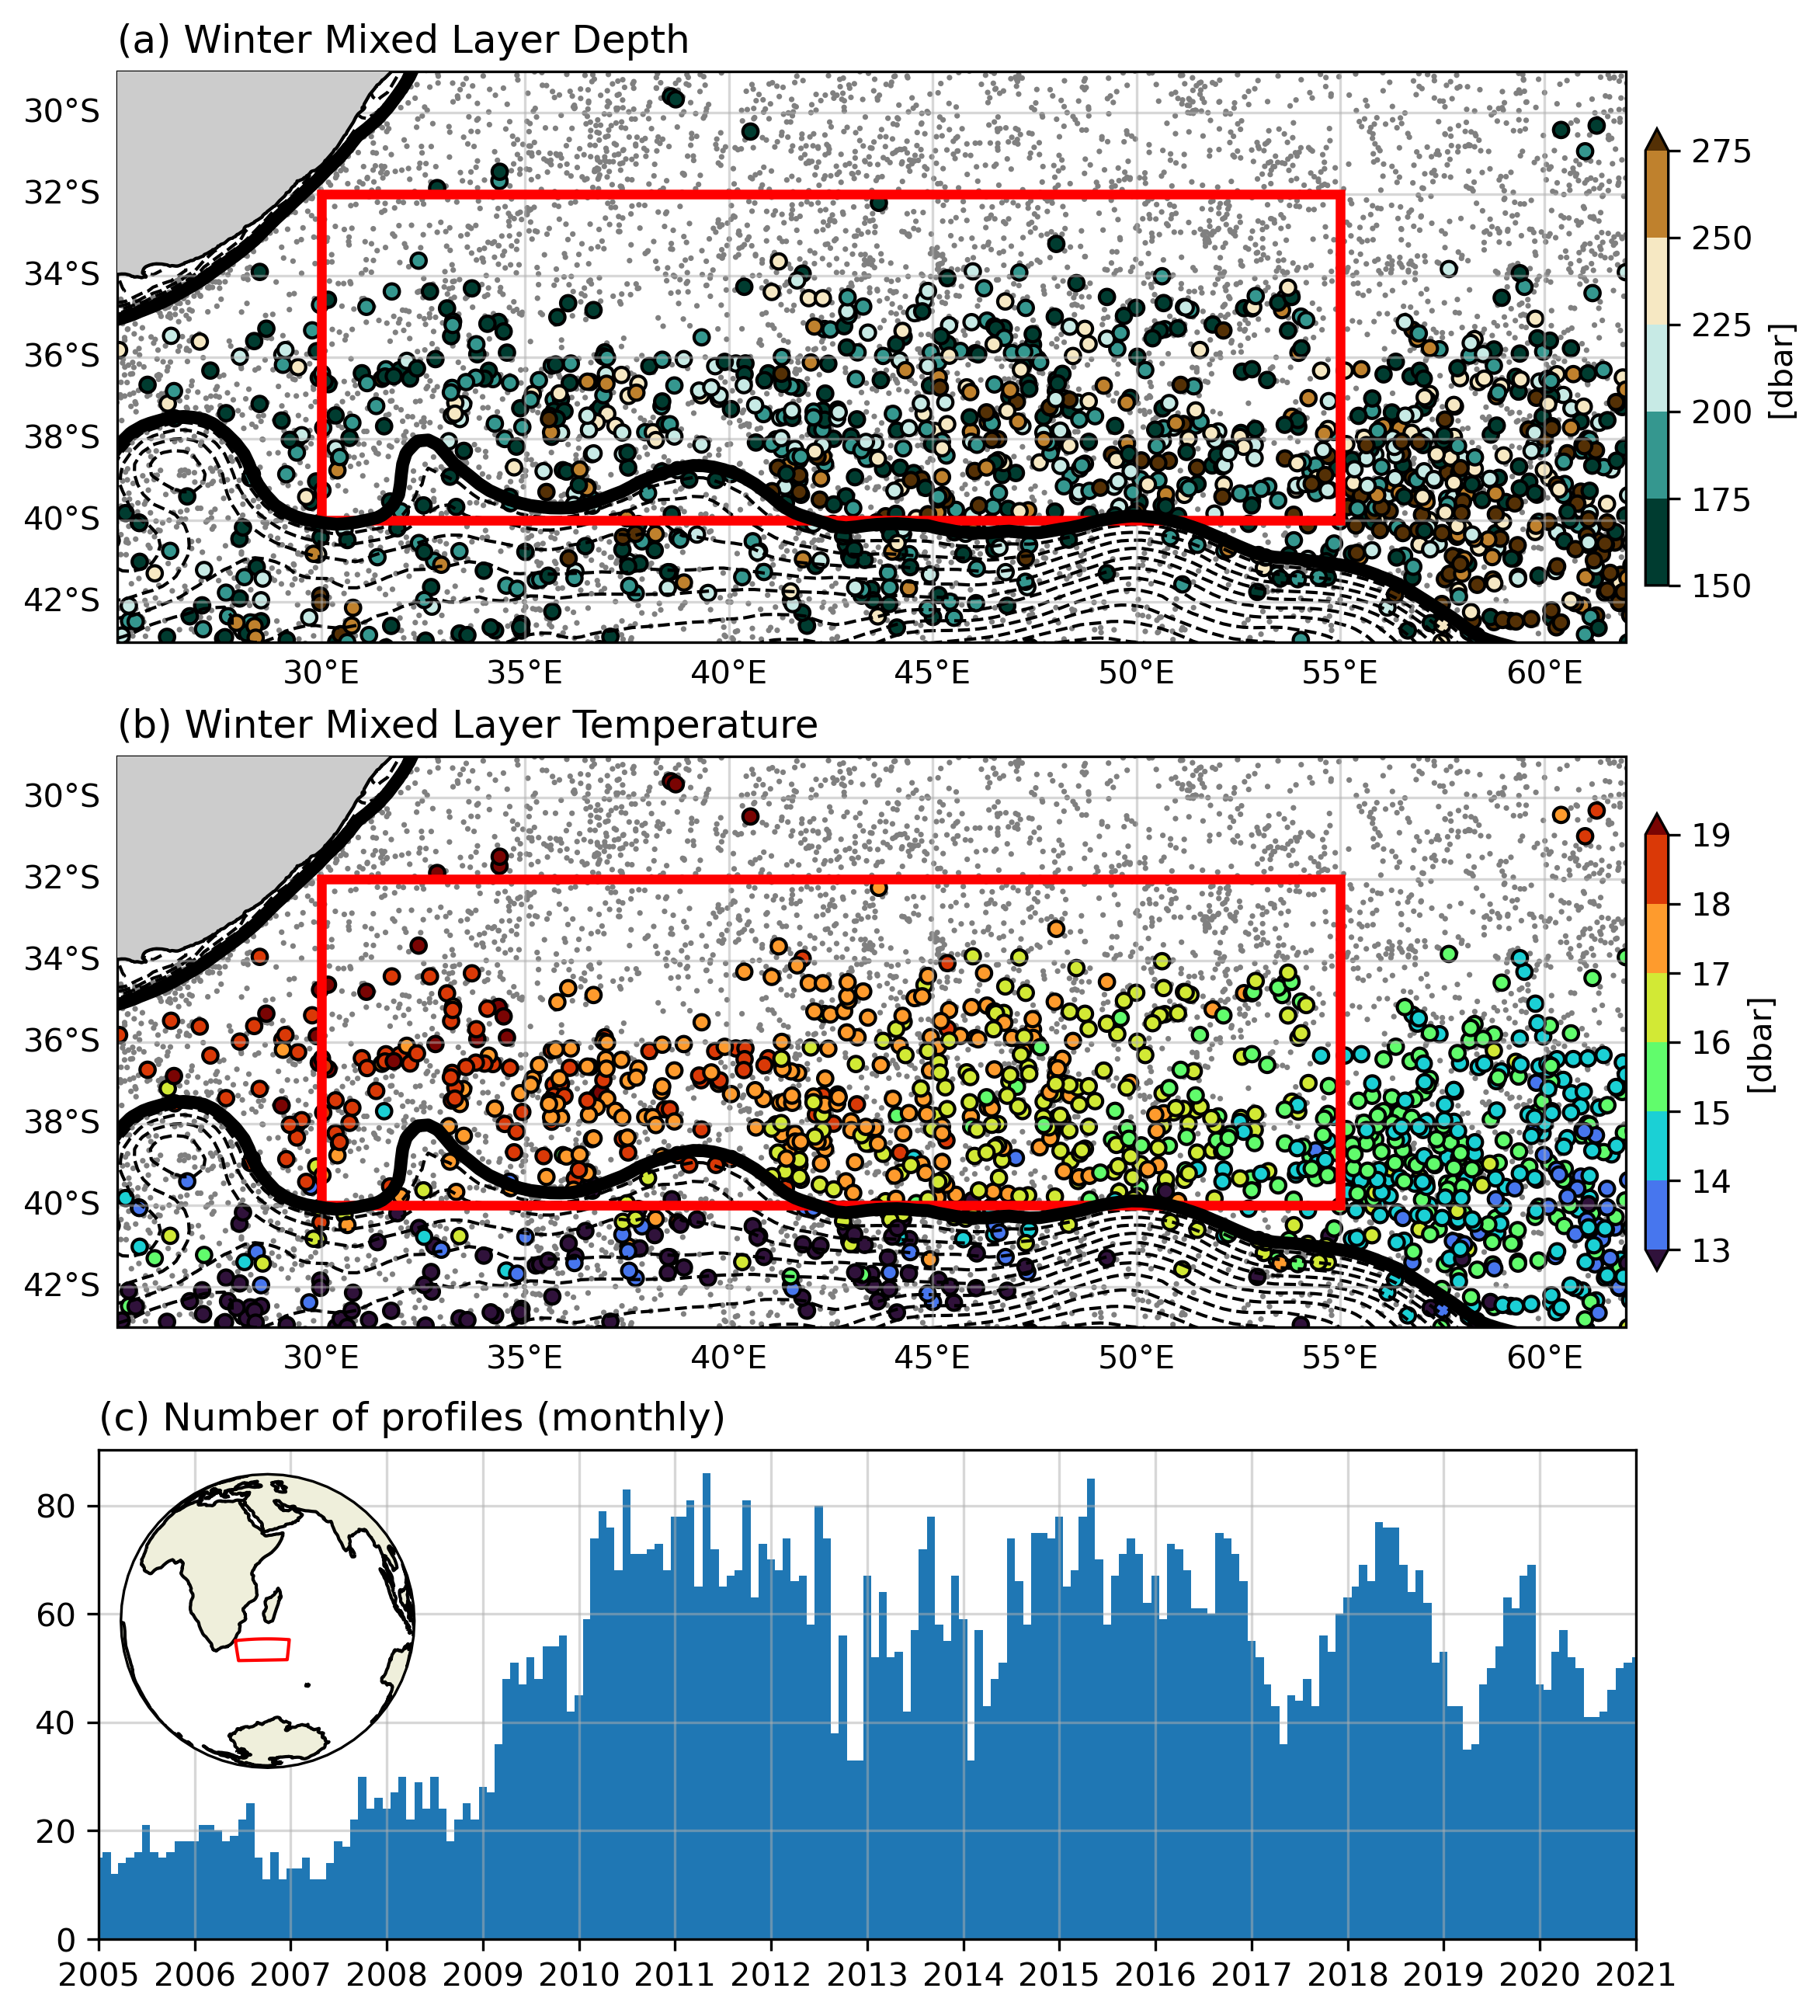

In [14]:
fig, axes = plt.subplots(dpi=300, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=[11,7], nrows=2)

for ax in axes:
    ax.coastlines()
    gl=ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    ax.set_extent([25,62,-43,-29], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=5, edgecolor='k')
    
    # plot SSH
    plot_ssh(1)
    # extra
    add_rect(30, -40, 25, 8, 3, 3)

depth_min=150 # only mld deeper than depth_min are plotted

### AXES 0 ###
ax=axes[0]
levels_=np.arange(depth_min,276,25)
cmap_ = 'BrBG_r'
extend_ = 'max'
hue_ = 'mld'

# plot shallow mld
plot_shallow_mld(jun_mld_properties, depth_min, 'None', 3)
plot_shallow_mld(jul_mld_properties, depth_min, 'None', 3)
plot_shallow_mld(aug_mld_properties, depth_min, 'None', 3)
# plot deep mld
plot_deep_mld(jun_mld_properties, depth_min, 'k', levels_, 22, cmap_, hue_, extend_)
plot_deep_mld(jul_mld_properties, depth_min, 'k', levels_, 22, cmap_, hue_, extend_)
im=plot_deep_mld(aug_mld_properties, depth_min, 'k', levels_, 22, cmap_, hue_, extend_)
# color bar
cbar=fig.colorbar(im, pad=0.01, label='[dbar]',
                 shrink=0.8, ax=ax,)

ax.set_title('')
ax.set_title('(a) Winter Mixed Layer Depth', loc='left')

### AXES 1 ###
ax=axes[1]
levels_=np.arange(13,19.1,1)
cmap_ = 'turbo'
extend_ = 'both'
hue_ = 'ml_temp'

# plot shallow mld
plot_shallow_mld(jun_mld_properties, depth_min, 'None', 3)
plot_shallow_mld(jul_mld_properties, depth_min, 'None', 3)
plot_shallow_mld(aug_mld_properties, depth_min, 'None', 3)
# plot deep mld
plot_deep_mld(jun_mld_properties, depth_min, 'k', levels_, 22, cmap_, hue_, extend_)
plot_deep_mld(jul_mld_properties, depth_min, 'k', levels_, 22, cmap_, hue_, extend_)
im=plot_deep_mld(aug_mld_properties, depth_min, 'k', levels_, 22, cmap_, hue_, extend_)
# color bar
cbar=fig.colorbar(im, pad=0.01, label='[dbar]',
                 shrink=0.8, ax=ax,)

ax.set_title('')
ax.set_title('(b) Winter Mixed Layer Temperature', loc='left')

### AXES 2 ###
ax = fig.add_axes([0.18,-0.265,0.6,0.3])

ax.bar(monthly_data_count_study_area.time, 
       monthly_data_count_study_area, align='center', width=31.0)
ax.set_title('(c) Number of profiles (monthly)', loc='left')

tgl=pd.date_range('2005', '2021', freq='YS')
ax.set_xticks(tgl)
ax.set_xticklabels([str(i)[:4] for i in tgl])
ax.set_xlim(tgl[0], tgl[-1])

ax.grid(alpha=0.5)

# inset
extent = [30, 55, -40, -32]
add_inset(extent)

# Fig. 2

In [15]:
argo_summer = xr.open_dataset('Data/argo_study_area_dec_jan.nc')

In [16]:
dtdz_ = 1.5 # degC/100dbar
stmw_thick_minimum = 20 # dbar
adt_minimum = 0.65

In [17]:
stmw = argo_summer.where(
    argo_summer.pot_temp>=15).where(
    argo_summer.pot_temp<=18).where(argo_summer.dtdz<=dtdz_).where(argo_summer.pres>=argo_summer.mld)

In [18]:
stmw_thickness = (stmw.sal/stmw.sal).sum('pres')

In [19]:
argo_summer['stmw_thickness'] = stmw_thickness

In [20]:
profs_no_stmw = argo_summer.where(
    argo_summer.stmw_thickness<=stmw_thick_minimum).where(
    argo_summer.adt>adt_minimum).dropna('time', how='all')

In [21]:
profs_stmw = argo_summer.where(
    argo_summer.stmw_thickness>stmw_thick_minimum).where(
    argo_summer.adt>adt_minimum).dropna('time', how='all')

In [22]:
thick_median = argo_summer.stmw_thickness[argo_summer.stmw_thickness>20].median()

In [23]:
additional_median = 20

In [24]:
thick_profs = argo_summer.where(
    argo_summer.stmw_thickness>=thick_median+additional_median).dropna('time', how='all')

In [25]:
thin_profs = argo_summer.where(argo_summer.stmw_thickness>stmw_thick_minimum).where(
    argo_summer.stmw_thickness<(thick_median-additional_median)).dropna('time', how='all')

In [26]:
print(f'Number of profiles with thick STMW: {thick_profs.time.size}')
print(f'Number of profiles with thin STMW: {thin_profs.time.size}')
print(f'Number of profiles with no STMW: {profs_no_stmw.time.size}')

Number of profiles with thick STMW: 305
Number of profiles with thin STMW: 285
Number of profiles with no STMW: 725


In [27]:
mean_thick_profs = thick_profs.mean('time')
std_thick_profs = thick_profs.std('time')

mean_thin_profs = thin_profs.mean('time')
std_thin_profs = thin_profs.std('time')

mean_profs_no_stmw = profs_no_stmw.mean('time')
std_profs_no_stmw = profs_no_stmw.std('time')

In [28]:
def plot_vertical_argo(var_, xlim_, xlabel_):
    
    for each_time in profs_no_stmw.time.values:
        profnya = argo_summer.sel(time=str(each_time)).squeeze()
        profnya[var_].plot(ax=ax,y='pres', c='grey', alpha=0.4, zorder=2)
    
    for each_time in thin_profs.time.values:
        profnya = argo_summer.sel(time=str(each_time)).squeeze()
        profnya[var_].plot(ax=ax,y='pres', c='lightskyblue', alpha=0.6, zorder=2)

    for each_time in thick_profs.time.values:
        profnya = argo_summer.sel(time=str(each_time)).squeeze()
        profnya[var_].plot(ax=ax,y='pres', c='lightcoral', alpha=0.1, zorder=2)

    mean_thick_profs[var_].plot(ax=ax,y='pres', c='crimson', lw=4, zorder=4, label='Thick IOSTMW')
    mean_thin_profs[var_].plot(ax=ax,y='pres', c='b', lw=4, zorder=3, label='Thin IOSTMW')
    mean_profs_no_stmw[var_].plot(ax=ax,y='pres', c='k', lw=4, zorder=2, label='No IOSTMW')

    ax.invert_yaxis()
    ax.set_ylim(600,0)
    ax.set_xlim(xlim_[0], xlim_[1])
    ax.set_ylabel('Pressure [dbar]')
    ax.set_xlabel(xlabel_)

Text(205, 7, '(b)')

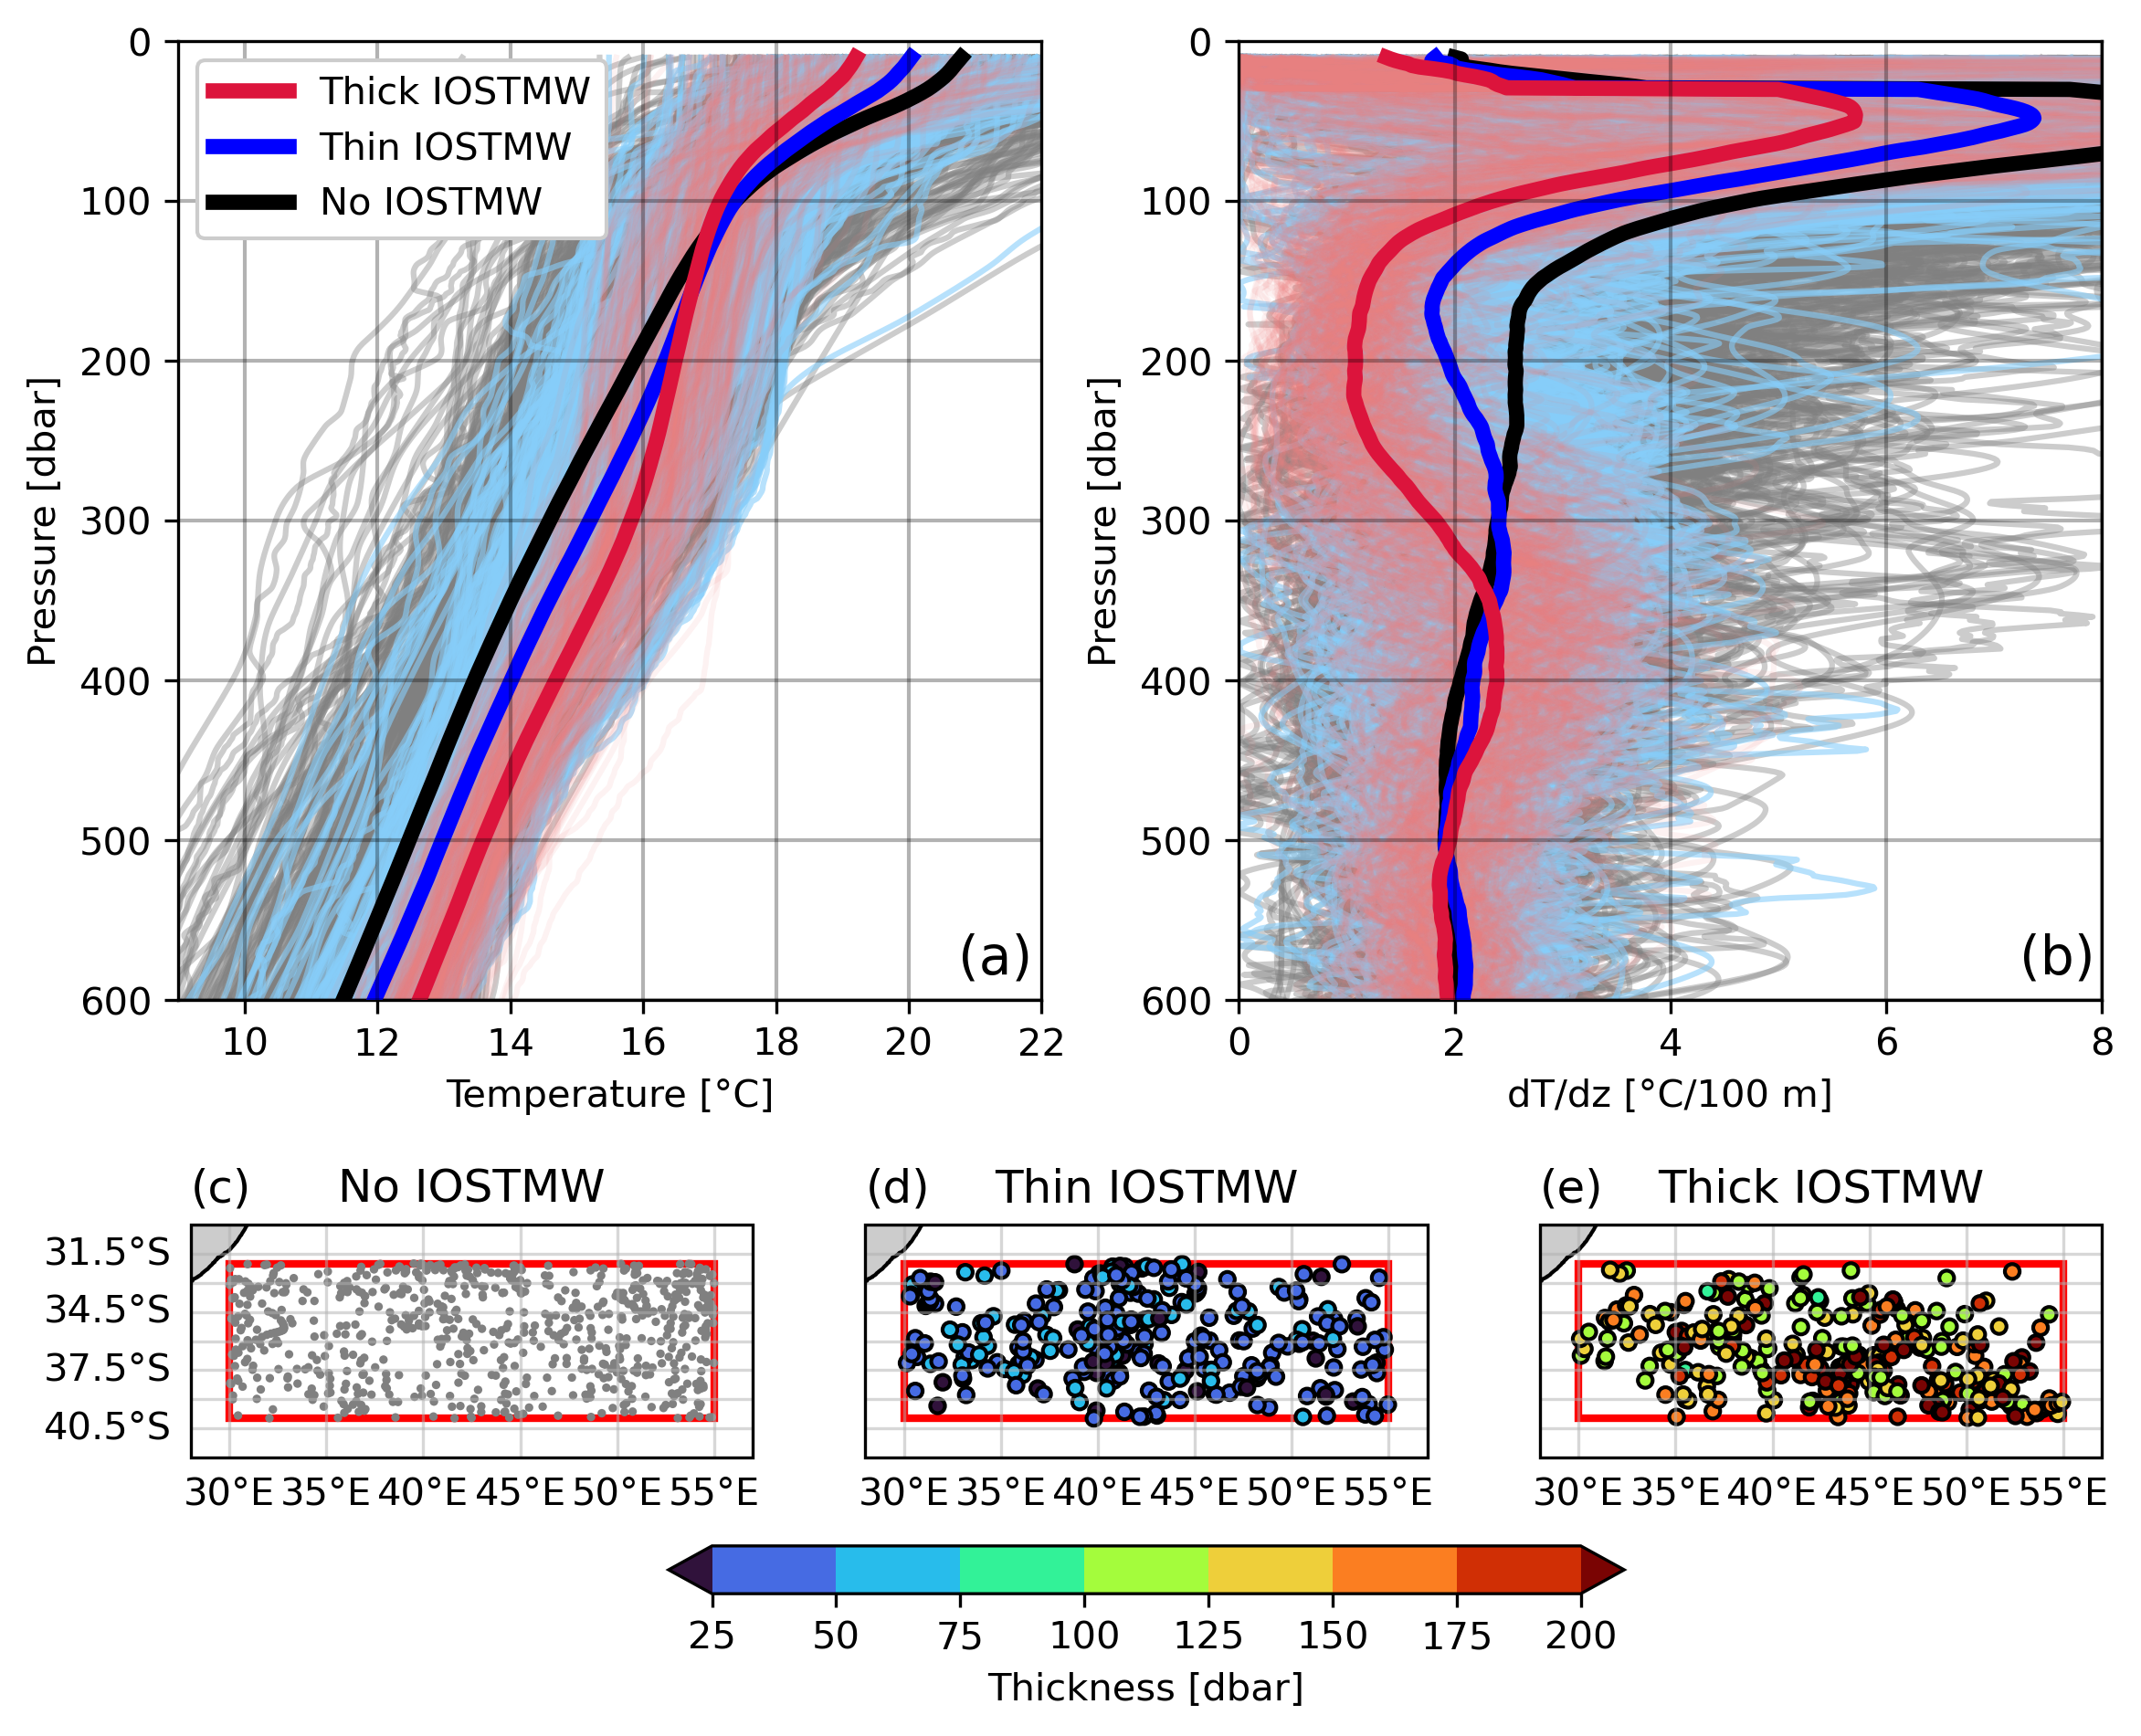

In [29]:
fig, axes = plt.subplots(dpi=300, subplot_kw={'projection':ccrs.PlateCarree()}, ncols=3, figsize=[9,7])

for i in range(len(axes)):
    ax=axes[i]
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    ax.add_feature(cfeature.LAND, facecolor='0.8')
    ax.set_extent([28,57,-42,-30], crs=ccrs.PlateCarree())
    
    if i>0:
        gl.left_labels=False
        
    add_rect(30, -40, 25, 8, 2, -5)

### AXES 0 ###
ax=axes[0]
levelsnya=np.arange(25,201,25)
profs_no_stmw.isel(pres=0).plot.scatter(ax=ax,x='lon', y='lat', c='grey',  edgecolor='None', s=5)

ax.set_title('No IOSTMW')
ax.set_title('(c)', loc='left')

### AXES 1 ###
ax=axes[1]
cmap_='turbo'
s_=15
levels_=np.arange(25,201,25)
thin_profs.isel(pres=0).plot.scatter(ax=ax,x='lon', y='lat', 
                                     hue='stmw_thickness', levels=levels_,
                                     extend='both', edgecolor='k',
                                     cmap=cmap_, add_colorbar=False, s=s_)
ax.set_title('Thin IOSTMW')
ax.set_title('(d)', loc='left')

### AXES 2 ###
ax=axes[2]
im=thick_profs.isel(pres=0).plot.scatter(ax=ax,x='lon', y='lat', 
                                         hue='stmw_thickness', levels=levels_,
                                         extend='both', edgecolor='k',
                                         cmap=cmap_, add_colorbar=False, s=s_)

ax.set_title('Thick IOSTMW')
ax.set_title('(e)', loc='left')

cbar=fig.colorbar(im, ax=axes, label='Thickness [dbar]', shrink=0.5, orientation='horizontal', pad=0.06)

### Additional axes ###
ax = fig.add_axes([0.12,0.51,0.35,0.5])
plot_vertical_argo('pot_temp', [9,22], 'Temperature [°C]')

for i in np.arange(100,601,100):  
    ax.hlines(i,8,22, lw=1, ls='-', color='k', alpha=0.3, zorder=100)
for i in np.arange(10,21,2):  
    ax.vlines(i,700,0, lw=1, ls='-', color='k', alpha=0.3, zorder=100)
ax.annotate(f'(a)', xy=[205,7], xycoords='axes points', size=14)
ax.legend(loc='upper left', framealpha=1).set_zorder(1000)

### Additional axes ###
ax = fig.add_axes([0.55,0.51,0.35,0.5])
plot_vertical_argo('dtdz', [0,8], 'dT/dz [°C/100 m]')

for i in np.arange(100,601,100):  
    ax.hlines(i,-2,13, lw=1, ls='-', color='k', alpha=0.3, zorder=100)
for i in np.arange(-2,13,2):  
    ax.vlines(i,800,0, lw=1, ls='-', color='k', alpha=0.3, zorder=100)
ax.annotate(f'(b)', xy=[205,7], xycoords='axes points', size=14)

# Fig. 3

In [30]:
def some_details(max_depth):
    ax.set_ylabel('Pressure [dbar]')
    ax.set_xlabel('')
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
    ax.set_ylim(0,max_depth)
    ax.invert_yaxis()

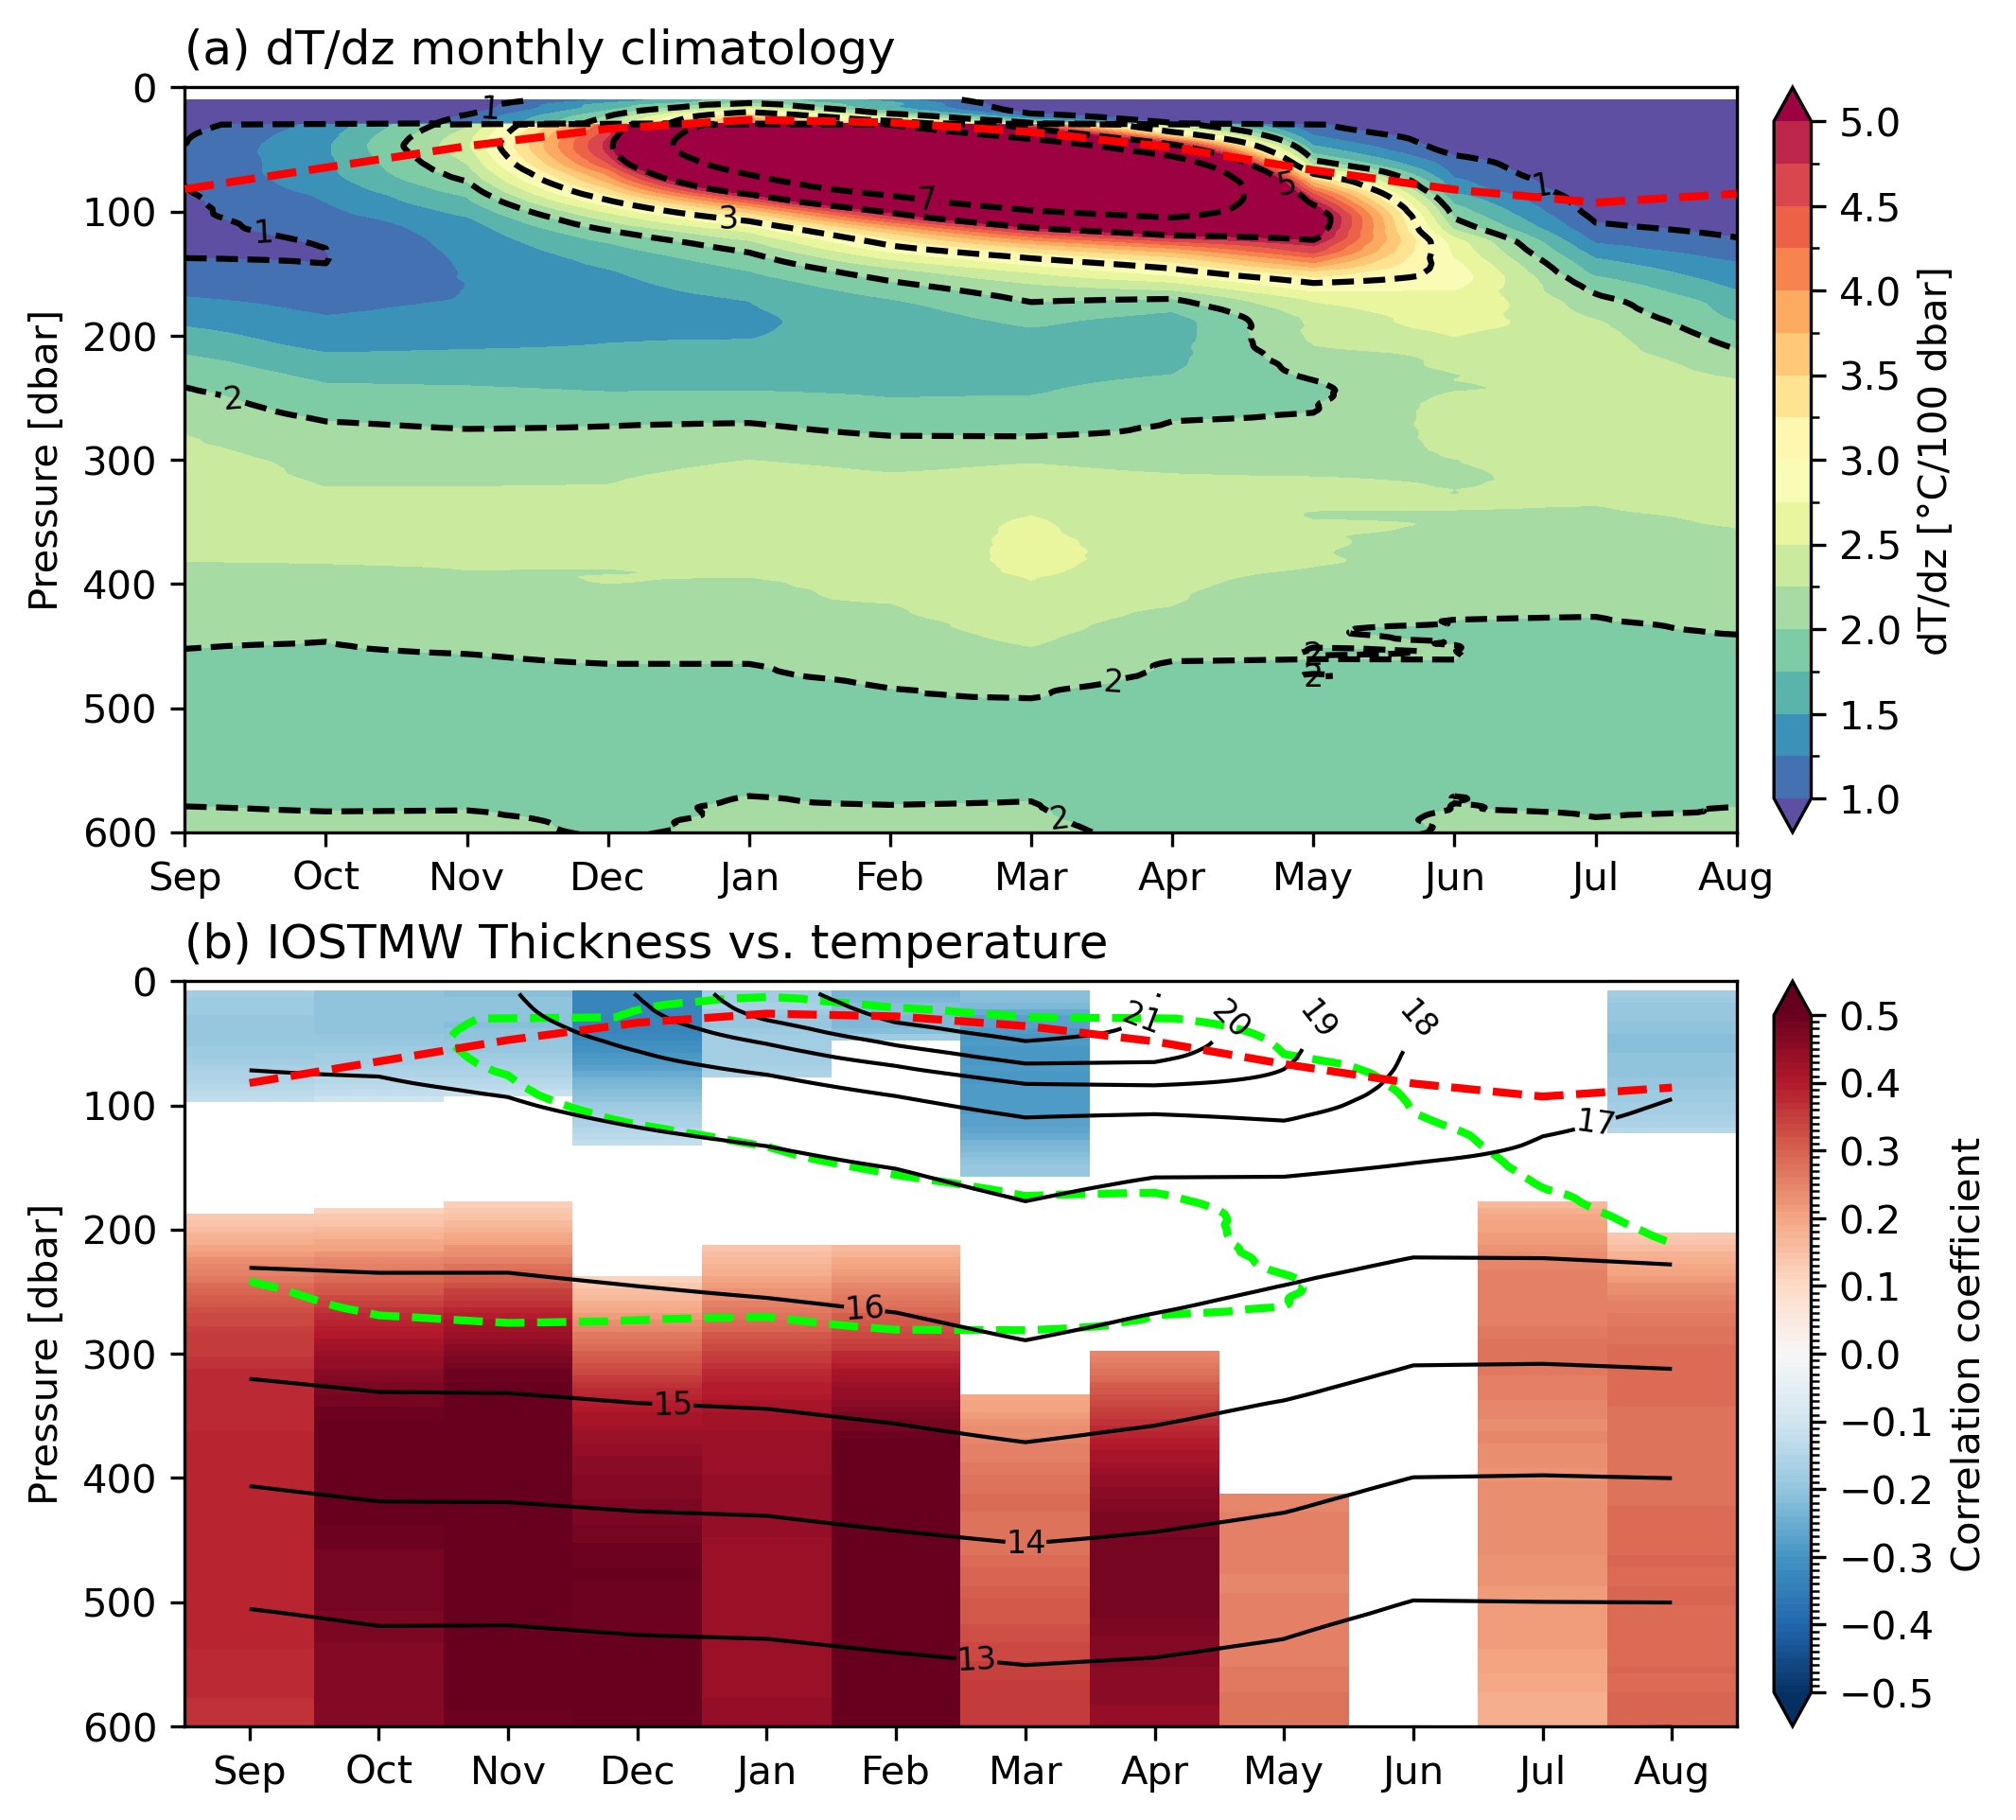

In [31]:
fig, axes = plt.subplots(dpi=300, nrows=2, figsize=[8.5,7.5])

ax=axes[0]
corr.dtdz.plot.contour(ax=ax,y='depth_ori', levels=[1,2,3,5,7],
                       colors='k', 
                       linestyles='--').clabel(fmt='%.0f',fontsize=8)
im=corr.dtdz.plot.contourf(ax=ax,y='depth_ori', 
                           levels=np.arange(1,5.001,0.25),
                           cmap='Spectral_r', 
                           add_colorbar=False)
corr.mld.plot(ax=ax,c='r', ls='--', lw=2, zorder=100)
cbar=fig.colorbar(im, pad=0.02, ax=ax, label='dT/dz [°C/100 dbar]')
ax.set_title('(a) dT/dz monthly climatology', loc='left')
some_details(600)


ax=axes[1]
im=corr.where(corr.p_thick_temp<0.01).r_thick_temp.plot(ax=ax,y='depth', 
                                                        levels=np.arange(-0.5,0.5001,0.01), cmap='RdBu_r',
                                                        extend='both', add_colorbar=False)
corr.dtdz.where(corr.depth_ori<300).plot.contour(ax=ax,
                                                 y='depth_ori', levels=[2],
                                                 colors='lime', linestyles='--', linewidths=2)
corr.temp.plot.contour(ax=ax,y='depth_ori', levels=np.arange(1,35,1),
                                     colors='k', linewidths=1).clabel(fmt='%.0f',fontsize=8)
corr.mld.plot(c='r', ls='--', lw=2, zorder=100)

cbar=fig.colorbar(im, ax=ax,ticks=np.arange(-0.5,0.5001,0.1), label='Correlation coefficient', pad=0.02)
ax.set_title('(b) IOSTMW Thickness vs. temperature', loc='left')
some_details(600)

# Fig. 4

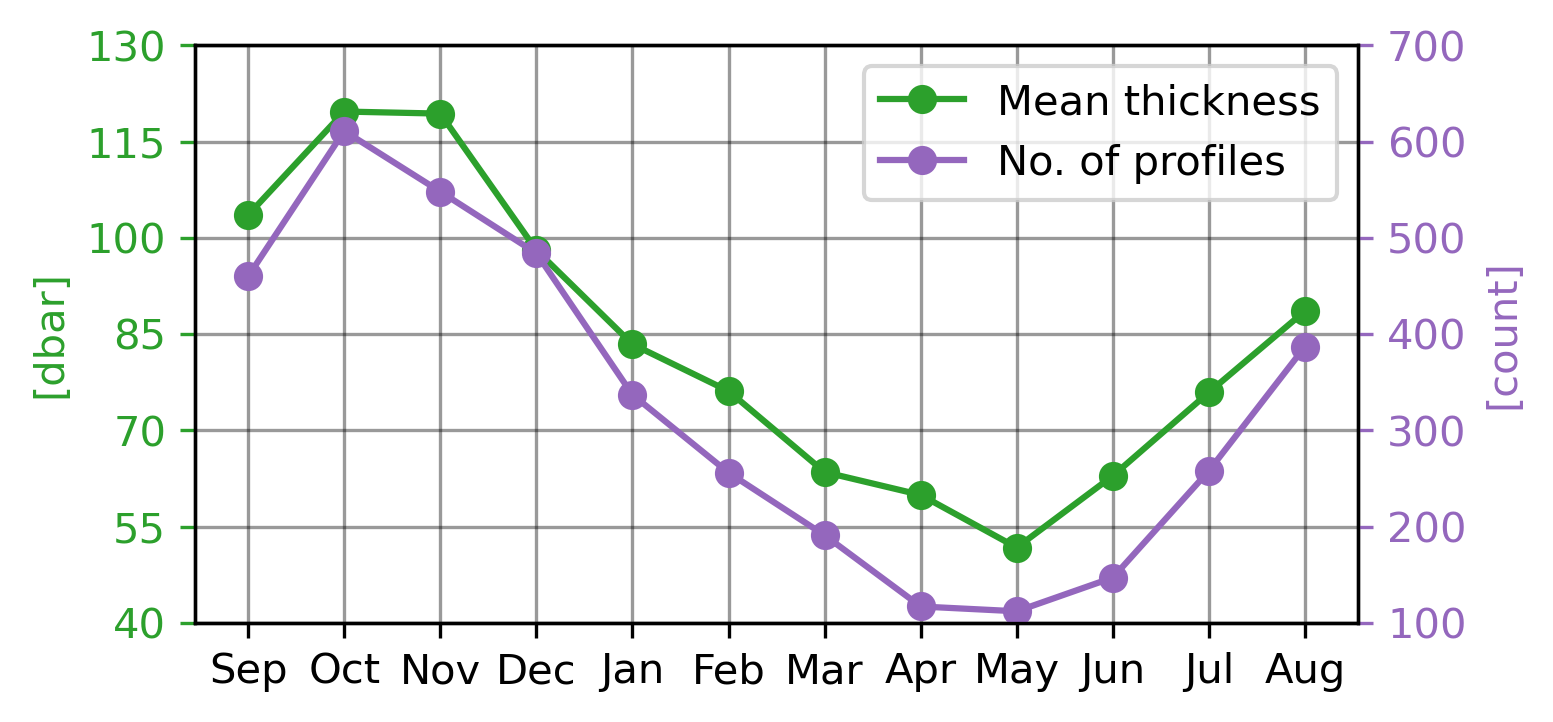

In [32]:
fig, ax = plt.subplots(dpi=300, figsize=[5,2.5])

cnya='tab:green'
fig1 = ax.errorbar(x=np.arange(0,12), y=for_fig4.mean_thickness, marker='o',
            c=cnya, label='Mean thickness')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
ax.grid(alpha=0.4, c='k')
ax.set_yticks(np.arange(40,151,15))
ax.set_ylim(40,130)
ax.tick_params(colors=cnya, axis='y')
ax.set_ylabel('[dbar]', color=cnya)

ax2=ax.twinx()
cnya='tab:purple'
fig2 = ax2.errorbar(x=np.arange(0,12), y=for_fig4.prof_count, marker='o', c=cnya, label='No. of profiles')
ax2.set_ylim(100,700)
ax2.tick_params(colors=cnya, axis='y')
ax2.set_ylabel('[count]', color=cnya)

lines=[fig1, fig2]
ax.legend(handles=lines, labels=[l.get_label() for l in lines])

# Fig. 5

In [33]:
def plot_diff(var_, cmap_, extend_, levels_, title_, shrink_cbar, label_, mask=True):
    if mask:
        im=thick_thin_diff_summer[var_].where(thick_thin_diff_summer.no_total_profs>30).plot(
            ax=ax, levels=levels_, extend=extend_, 
            cmap=cmap_, add_colorbar=False)
        cbar=fig.colorbar(im, ax=ax, shrink=shrink_cbar, pad=0.02, label=label_)
        ax.set_title(title_, loc='left')
    else:
        im=thick_thin_diff_summer[var_].plot(ax=ax, levels=levels_, extend=extend_, 
                                             cmap=cmap_, add_colorbar=False)
        cbar=fig.colorbar(im, ax=ax, shrink=shrink_cbar, pad=0.02, label=label_)
        ax.set_title(title_, loc='left')

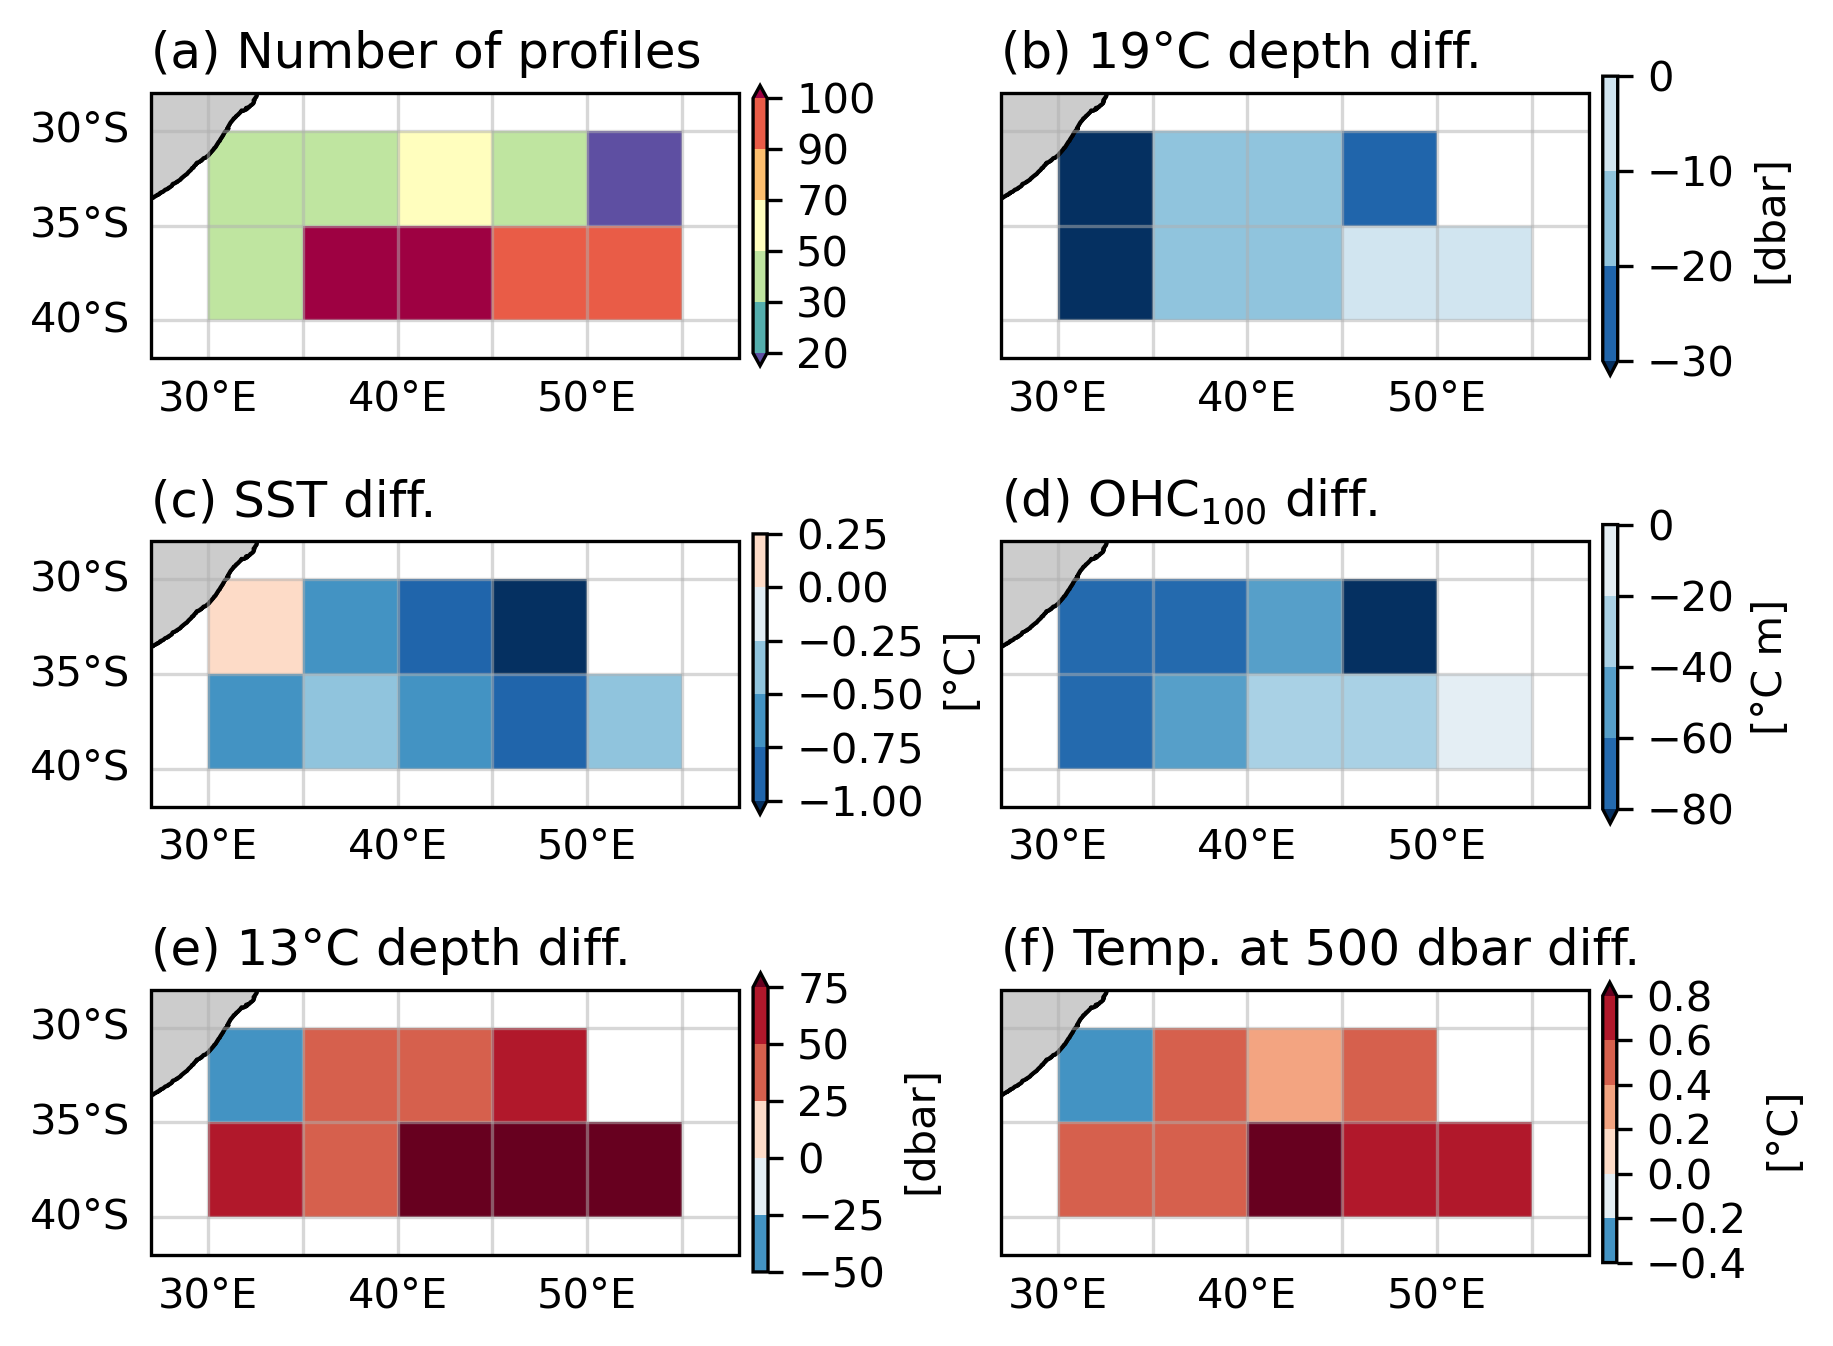

In [34]:
fig, axes = plt.subplots(dpi=300, subplot_kw={'projection':ccrs.PlateCarree()},
                        ncols=2, nrows=3, figsize=[6.7,5.5])
flat = axes.flat

for i in range(len(flat)):
    ax=flat[i]
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.ylocator = mticker.FixedLocator(np.arange(-45,-29,5))    
    gl.top_labels=False
    gl.right_labels=False
    buat_extent=[27,58,-42,-28]
    ax.set_extent(buat_extent, crs=ccrs.PlateCarree())
    
    
    #if i not in [6, 7]:
    #    gl.bottom_labels=False
    if i in np.arange(1,8,2):
        gl.left_labels=False
    
# NO OF PROFILES
ax=flat[0]
levels_ = np.arange(30,101,20)
levels_ = np.insert(levels_,[0,-1],[20,100])
plot_diff('no_total_profs', 'Spectral_r', 'both', levels_, '(a) Number of profiles', 0.75, '', mask=False)

# 19degC depth
ax=flat[1]
levels_ = np.arange(-30,0.001,10)
new_cmap = matplotlib.colormaps['RdBu']
for_cbar = np.linspace(0.6,1,5)
newcolors = new_cmap(for_cbar[::-1])
new_cmap = ListedColormap(newcolors)
plot_diff('depth_19deg_diff', new_cmap, 'min', levels_, '(b) 19°C depth diff.', 0.8, '[dbar]')

# SST
ax=flat[2]
new_cmap = matplotlib.colormaps['RdBu']
for_cbar = [0.4,0.56, 0.7, 0.8, 0.9, 1. ]
newcolors = new_cmap(for_cbar[::-1])
new_cmap = ListedColormap(newcolors)
levels_ = np.arange(-1.,0.25+0.0001,0.25)
plot_diff('sst_diff', new_cmap, 'min', levels_, '(c) SST diff.', 0.75, '[°C]')

# OHC
ax=flat[3]
new_cmap = matplotlib.colormaps['RdBu']
for_cbar = np.linspace(0.55,1,5)
newcolors = new_cmap(for_cbar[::-1])
new_cmap = ListedColormap(newcolors)
levels_ = np.arange(-80,0.001,20)
plot_diff('ohc_diff', new_cmap, 'min', levels_, '(d) OHC$_{100}$ diff.', 0.8, '[°C m]')

# 13degC depth
ax=flat[4]
new_cmap = matplotlib.colormaps['RdBu_r']
for_cbar = [0.2,0.45, 0.6, 0.7, 0.8, 0.9, 1]
newcolors = new_cmap(for_cbar)
new_cmap = ListedColormap(newcolors)
levels_ = np.arange(-50,75.001,25)

plot_diff('depth_13deg_diff', new_cmap, 'max', levels_, '(e) 13°C depth diff.', 0.8, '[dbar]')

# Temp at 500 dbar
ax=flat[5]
new_cmap = matplotlib.colormaps['RdBu']
for_cbar = [0, 0.1, 0.2, 0.3, 0.4, 0.55, 0.8]
newcolors = new_cmap(for_cbar[::-1])
new_cmap = ListedColormap(newcolors)
levels_=np.arange(-0.4,0.8001,0.2)
plot_diff('temp_500_diff', new_cmap, 'max', levels_, '(f) Temp. at 500 dbar diff.', 0.75, '[°C]')

# Fig. 6

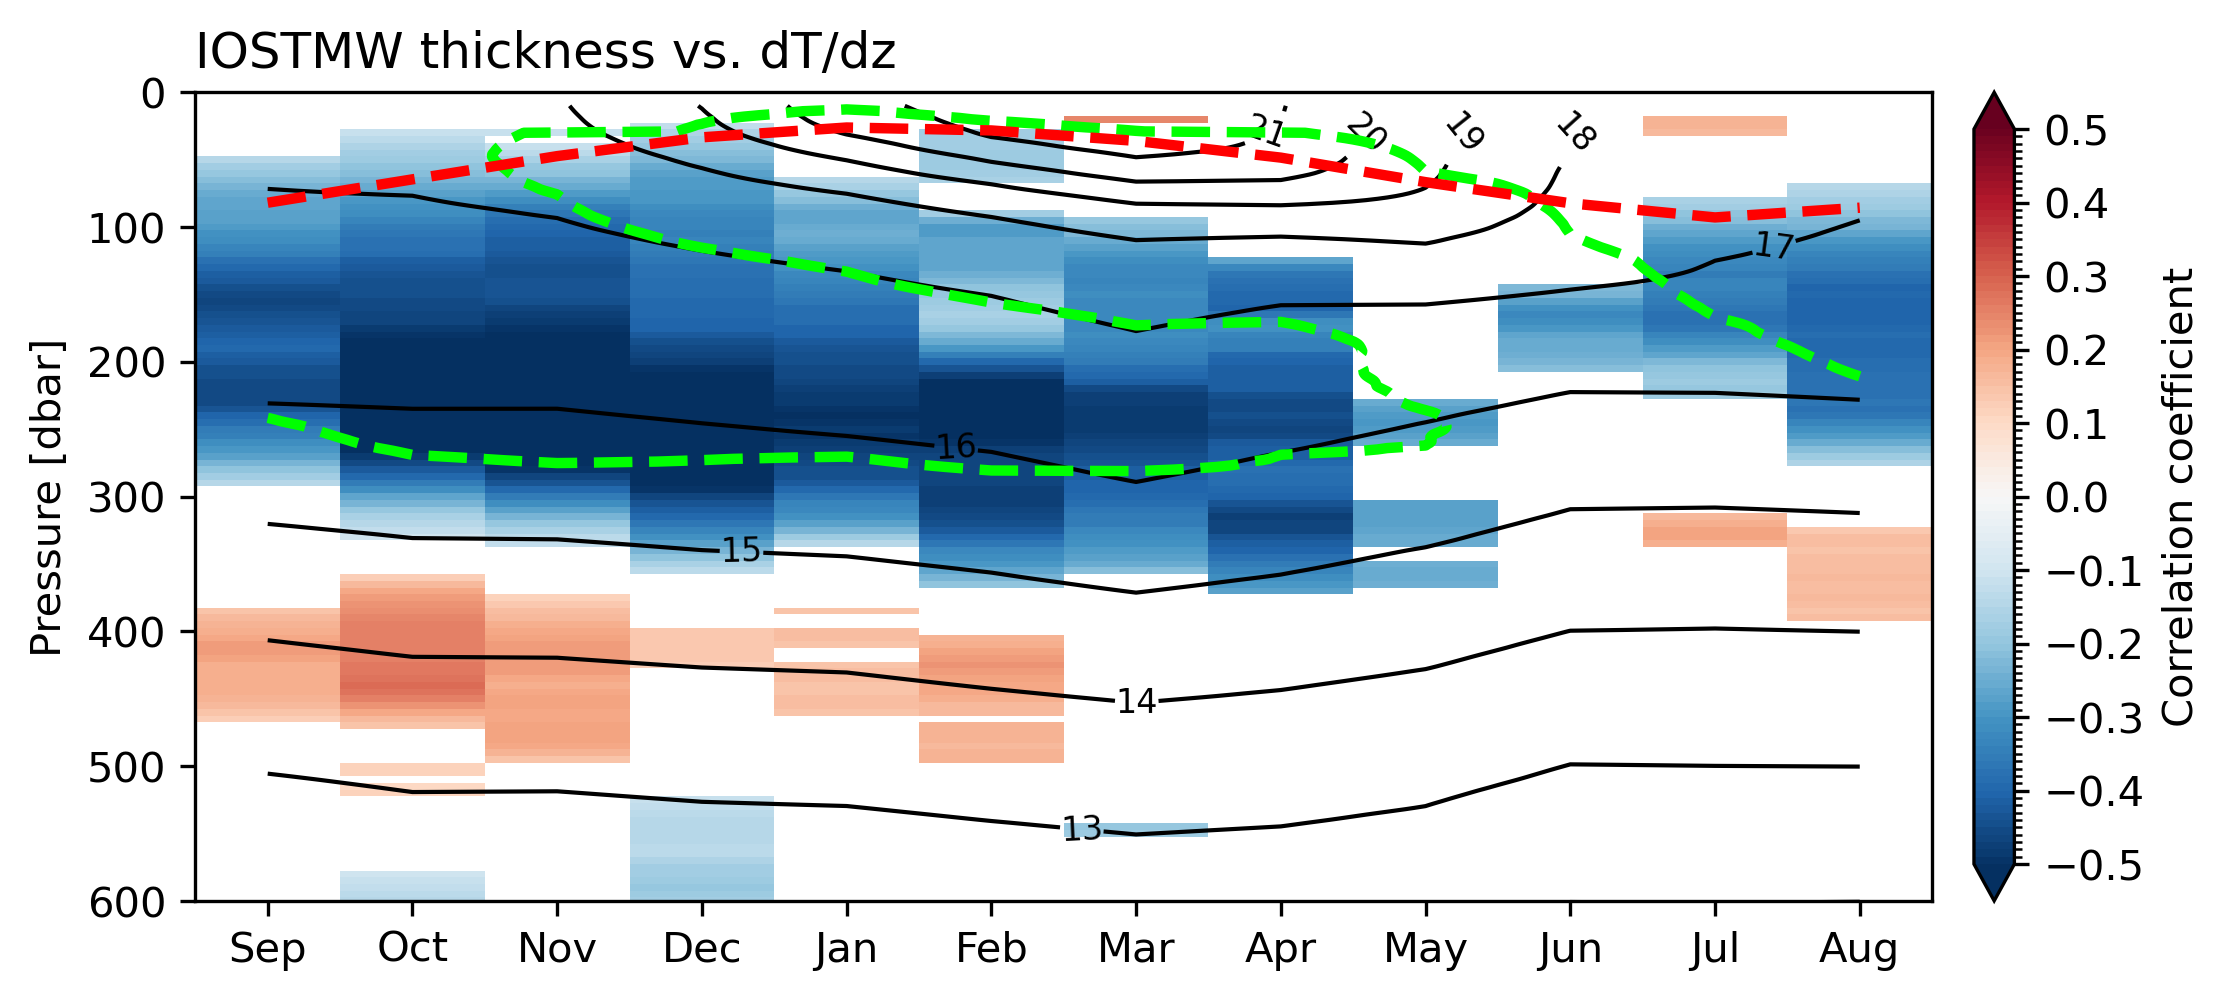

In [35]:
fig, ax = plt.subplots(dpi=300, figsize=[9,3.5])

im=corr.where(corr.p_thick_dtdz<0.01).r_thick_dtdz.plot(ax=ax,y='depth', 
                            levels=np.arange(-0.5,0.5001,0.01), cmap='RdBu_r',
                            extend='both', add_colorbar=False)
corr.dtdz.where(corr.depth_ori<300).plot.contour(ax=ax,
                                                 y='depth_ori', levels=[2],
                                                 colors='lime', linestyles='--', linewidths=2.5, zorder=100)
corr.temp.plot.contour(ax=ax,y='depth_ori', levels=np.arange(1,35,1),
                                     colors='k', linewidths=1).clabel(fmt='%.0f',fontsize=8)
corr.mld.plot(c='r', ls='--', lw=2.5, zorder=100)

ax.set_title('IOSTMW thickness vs. dT/dz', loc='left')
cbar=fig.colorbar(im, ticks=np.arange(-0.5,0.5001,0.1), label='Correlation coefficient', pad=0.02)
some_details(600)

# Fig. 7

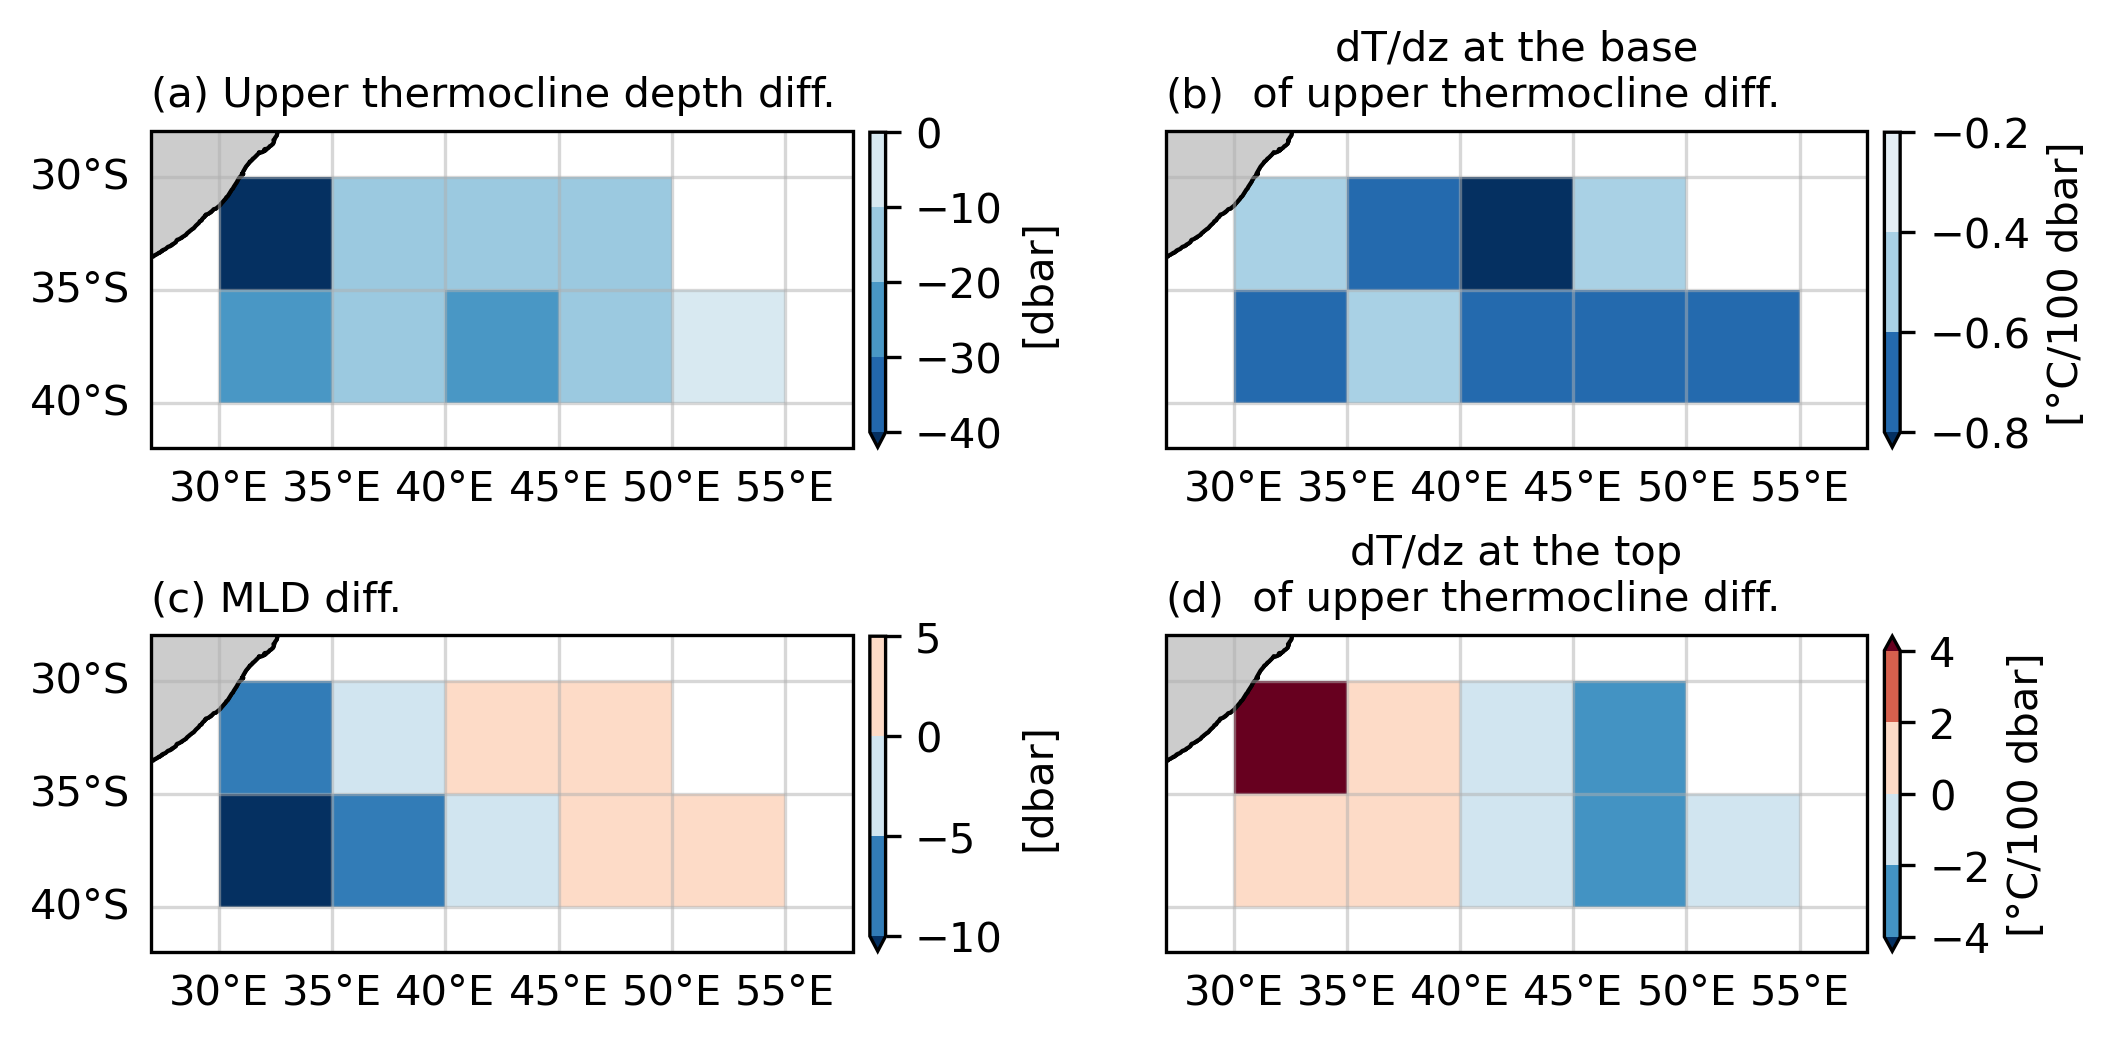

In [36]:
fig, axes = plt.subplots(dpi=300, subplot_kw={'projection':ccrs.PlateCarree()},
                        ncols=2, nrows=2, figsize=[8.,4])
flat = axes.flat

for i in range(len(flat)):
    ax=flat[i]
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.ylocator = mticker.FixedLocator(np.arange(-45,-29,5))    
    gl.top_labels=False
    gl.right_labels=False
    buat_extent=[27,58,-42,-28]
    ax.set_extent(buat_extent, crs=ccrs.PlateCarree())
    if i in np.arange(1,8,2):
        gl.left_labels=False

# upper therm depth
ax=flat[0]
new_cmap = matplotlib.colormaps['RdBu_r']
for_cbar = np.linspace(0,0.42, 5)
newcolors = new_cmap(for_cbar)
new_cmap = ListedColormap(newcolors)
levels_ = np.arange(-40,1.001,10)
plot_diff('therm_depth_diff', new_cmap, 'min', levels_, '', 0.75, '[dbar]')
ax.set_title('(a) Upper thermocline depth diff.', loc='left', fontsize=10);

# top thermocline dtdz
ax=flat[1]
new_cmap = matplotlib.colormaps['RdBu_r']
for_cbar = np.linspace(0,0.45, 5)
newcolors = new_cmap(for_cbar)
new_cmap = ListedColormap(newcolors)
levels_ = np.arange(-0.8,-0.1001,0.2)
plot_diff('dtdz_upper_mw_diff', new_cmap, 'min', levels_, '', 0.75, '[°C/100 dbar]')
ax.set_title('(b)', loc='left', fontsize=10);
ax.set_title('dT/dz at the base\n of upper thermocline diff. ', fontsize=10);

# mld
ax=flat[2]
new_cmap = matplotlib.colormaps['RdBu']
for_cbar = [0.4, 0.6, 0.75, 0.85, 1 ][::-1]
newcolors = new_cmap(for_cbar)
new_cmap = ListedColormap(newcolors)
levels_=np.arange(-10,5.001,5)
plot_diff('mld_diff', new_cmap, 'min', levels_, '', 0.75, '[dbar]')
ax.set_title('(c) MLD diff.', loc='left', fontsize=10);

# upper therm dtdz
ax=flat[3]
new_cmap = matplotlib.colormaps['RdBu_r']
levels_ = np.arange(-4,4.001,2)

plot_diff('dtdz_base_mld_mw_diff', new_cmap, 'both', levels_, '', 0.75, '[°C/100 dbar]')
ax.set_title('(d)', loc='left', fontsize=10);
ax.set_title('dT/dz at the top\n of upper thermocline diff. ', fontsize=10);

# Fig. 8

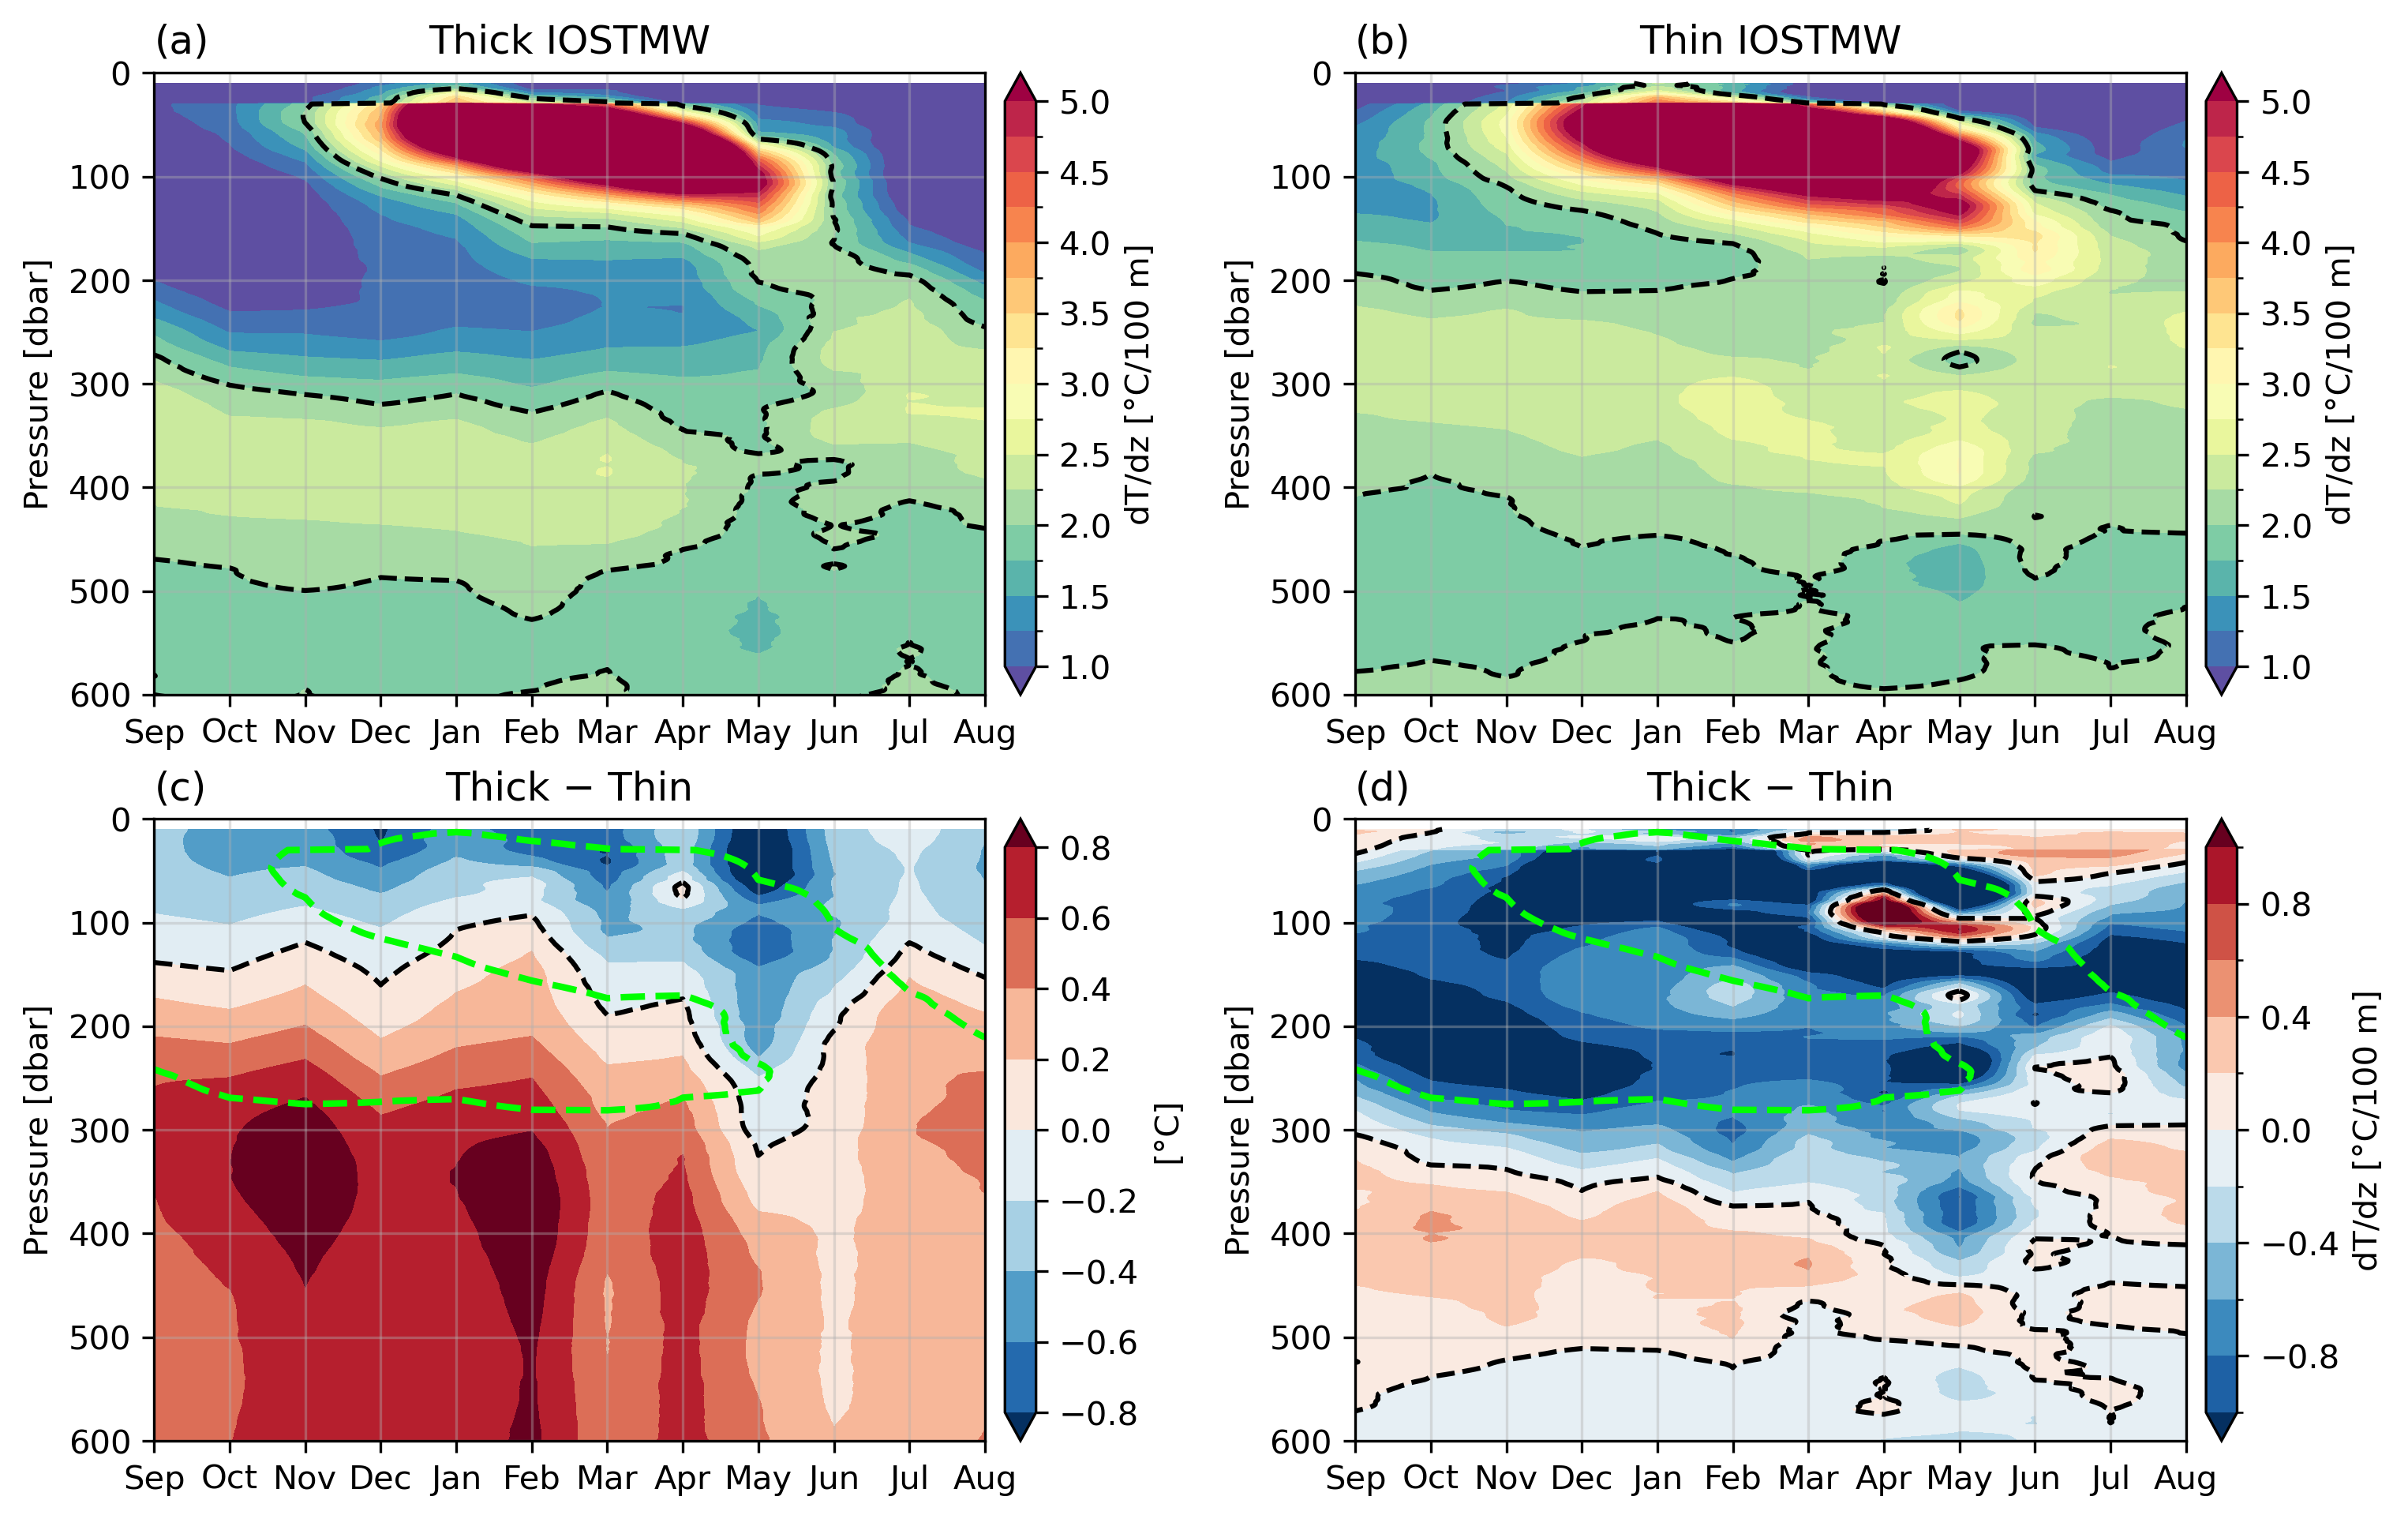

In [37]:
fig, axes = plt.subplots(dpi=300, nrows=2, ncols=2, figsize=[12,7.5])

levels_dtdz = np.arange(1,5.001,0.25)
cmapnya='Spectral_r'

flat=axes.flat

### AXES 0 ###
ax=flat[0]
thick_thin_clim.dtdz_thick.plot.contour(ax=ax,y='depth_ori', levels=[2],
                                     colors='k', linestyles='--')
im=thick_thin_clim.dtdz_thick.plot.contourf(ax=ax,y='depth_ori', levels=levels_dtdz,cmap=cmapnya, 
                                              add_colorbar=False)

cbar=fig.colorbar(im, pad=0.02, ax=flat[0],label='dT/dz [°C/100 m]')
ax.set_title('Thick IOSTMW')
ax.set_title('(a)', loc='left')

### AXES 1 ###
ax=flat[1]
thick_thin_clim.dtdz_thin.plot.contour(ax=ax,y='depth_ori', levels=[2],
                                     colors='k', linestyles='--')

im=thick_thin_clim.dtdz_thin.plot.contourf(ax=ax,y='depth_ori', levels=levels_dtdz,cmap=cmapnya, 
                                              add_colorbar=False)

cbar=fig.colorbar(im, pad=0.02, ax=flat[1],label='dT/dz [°C/100 m]')
ax.set_title('Thin IOSTMW')
ax.set_title('(b)', loc='left')

### AXES 2 ###
ax=flat[2]
(thick_thin_clim.temp_thick - thick_thin_clim.temp_thin).plot.contour(y='depth_ori', levels=[0],
                                     colors='k', linestyles='--', ax=ax)
im=(thick_thin_clim.temp_thick - thick_thin_clim.temp_thin).plot.contourf(y='depth_ori' ,cmap='RdBu_r',
                                                                   levels=np.arange(-0.8,0.8001,0.2),
                                                                   extend='both',
                                                                   add_colorbar=False, ax=ax)
(thick_thin_clim.dtdz_clim.where(thick_thin_clim.depth_ori<300)).plot.contour(ax=ax,y='depth_ori', levels=[2],
                                     colors='lime', linestyles='--', linewidths=2)

cbar=fig.colorbar(im, pad=0.02, label='[°C]', ax=flat[2])
ax.set_title('Thick − Thin')
ax.set_title('(c)', loc='left')

### AXES 3 ###
ax=flat[3]
(thick_thin_clim.dtdz_thick - thick_thin_clim.dtdz_thin).plot.contour(y='depth_ori', levels=[0],
                                     colors='k', linestyles='--')
im=(thick_thin_clim.dtdz_thick - thick_thin_clim.dtdz_thin).plot.contourf(y='depth_ori' ,cmap='RdBu_r',
                                                                   levels=np.arange(-1,1.001,0.2),
                                                                   extend='both',
                                                                   add_colorbar=False)
(thick_thin_clim.dtdz_clim.where(thick_thin_clim.depth_ori<300)).plot.contour(ax=ax,y='depth_ori', levels=[2],
                                     colors='lime', linestyles='--', linewidths=2)

cbar=fig.colorbar(im, pad=0.02, label='dT/dz [°C/100 m]')
ax.set_title('Thick − Thin')
ax.set_title('(d)', loc='left')

### Extras ###
for ax in flat:
    ax.grid(alpha=0.4)
    some_details(600)